In [10]:
'''
Relative Frequency Distribution - A relative frequency distribution shows the proportion of the total number of observations associated with each value or class of values and is related to a probability distribution, which is extensively used in statistics.

Cummilative Frequency Distribution - Cumulative frequency distribution is a form of a frequency distribution that represents the sum of a class and all classes below it. ... The cumulative frequency distribution is extremely helpful when we need to determine the frequency up to a certain threshold.

Gaussian Distribution - Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

Q)What's the difference between Frequency and Relative Frequency? 
A)The only difference between a frequency histogram and a relative frequency histogram is that the vertical axis uses relative or proportional frequency instead of simple frequency

'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
from scipy import stats

deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [11]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [12]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [16]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


1      1
2      4
3     15
4     34
5     57
6     68
7     70
8     48
9     32
10    10
Name: win_by_wickets, dtype: int64


Text(0,0.5,'Frequency')

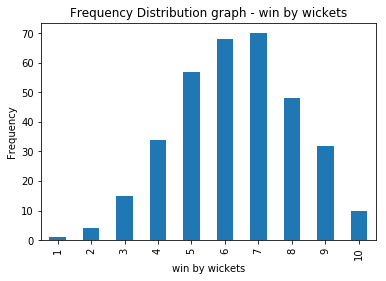

In [14]:
# Just Frequency

win_by_wickets_data = matches[matches.win_by_wickets > 0].win_by_wickets
win_by_wickets_freq = win_by_wickets_data.value_counts(sort=False)
print(win_by_wickets_freq)
plt = win_by_wickets_freq.plot.bar()
plt.set_title("Frequency Distribution graph - win by wickets")
plt.set_xlabel("win by wickets")
plt.set_ylabel("Frequency")

1     0.002950
2     0.011799
3     0.044248
4     0.100295
5     0.168142
6     0.200590
7     0.206490
8     0.141593
9     0.094395
10    0.029499
Name: win_by_wickets, dtype: float64


Text(0,0.5,'Relative frequency(%)')

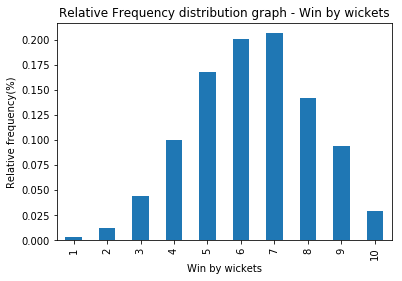

In [17]:
#relative frequency distribution graph

win_by_wickets_rel_freq = win_by_wickets_data.value_counts(sort =False, normalize =True)
print(win_by_wickets_rel_freq)
plt = win_by_wickets_rel_freq.plot.bar()
plt.set_title("Relative Frequency distribution graph - Win by wickets")

plt.set_xlabel("Win by wickets")
plt.set_ylabel("Relative frequency(%)")


1     0.002950
2     0.014749
3     0.058997
4     0.159292
5     0.327434
6     0.528024
7     0.734513
8     0.876106
9     0.970501
10    1.000000
Name: win_by_wickets, dtype: float64


Text(0,0.5,'Frequency')

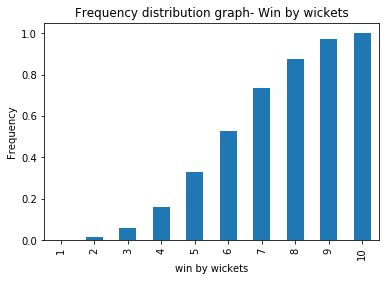

In [18]:
#Cumulative relative frequency graph
win_by_wickets_cumulative=win_by_wickets_data.value_counts(sort=False,normalize=True).cumsum()
print(win_by_wickets_cumulative)
plt=win_by_wickets_cumulative.plot.bar()

plt.set_title("Frequency distribution graph- Win by wickets")
plt.set_xlabel("win by wickets")
plt.set_ylabel("Frequency")

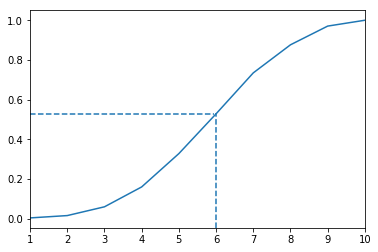

In [19]:
plt=win_by_wickets_cumulative.plot.line()
plt.axhline(y=win_by_wickets_cumulative[6],xmax=5.5/10,linestyle='dashed')
plt.axvline(x=6,ymax=win_by_wickets_cumulative[6],linestyle='dashed')

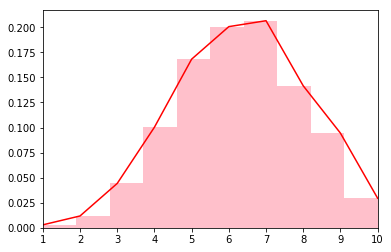

In [21]:
# Normal distribution - bell curve or gaussian distribution

#Mean and std

win_by_wickets_mean, win_by_wickets_std= win_by_wickets_data.mean(), win_by_wickets_data.std()

win_by_wickets_data.hist(color='pink', weights=np.zeros_like(win_by_wickets_data)+1.0/win_by_wickets_data.count())

win_by_wickets_data.value_counts(sort=False,normalize=True).plot.line(color='red')

#Normal dist
random_data=np.arange(1,10,0.0001)
plt.plot(random_data,stats.norm.pdf(random_data,win_by_wickets_mean,win_by_wickets_std),color='blue')